In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import layers, Sequential


In [2]:
train_ds ,val_ds= tf.keras.utils.image_dataset_from_directory("/Users/mohamedkhalaf/Programming/PY/raw-img",validation_split=0.2,image_size=(160,160),batch_size=16,subset='both',seed=1)

Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Using 5235 files for validation.


In [3]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))

In [4]:
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
preprocessing = Sequential([
    layers.Rescaling(1./255),  # Optional if not using preprocess_input
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Lambda(preprocess_input)  # Apply MobileNetV2 preprocessing
])

In [5]:
base_model= tf.keras.applications.MobileNetV2(input_shape=(160,160,3),include_top=False,weights='mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_160_no_top.h5')

In [6]:
inputs = base_model.input
base_model.trainable=False
x = preprocessing(inputs)   
x = base_model(x, training=False)      # 👈 pass through MobileNetV2
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(units=128,activation='relu')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs=inputs,outputs=outputs)


In [7]:
lr = 0.0001

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
    loss = 'sparse_categorical_crossentropy',
    metrics =['accuracy']
)

In [9]:
history = model.fit(train_ds,validation_data=val_ds,epochs=3,
          callbacks=tf.keras.callbacks.ModelCheckpoint('best_model.keras'))

Epoch 1/3
  14/1309 ━━━━━━━━━━━━━━━━━━━━ 1:25 66ms/step - accuracy: 0.2525 - loss: 2.2535

2025-05-27 18:27:32.268421: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 113/1309 ━━━━━━━━━━━━━━━━━━━━ 1:19 66ms/step - accuracy: 0.1986 - loss: 2.2823

2025-05-27 18:27:38.786556: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 429/1309 ━━━━━━━━━━━━━━━━━━━━ 59s 67ms/step - accuracy: 0.1835 - loss: 2.2633

2025-05-27 18:28:00.164778: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 458/1309 ━━━━━━━━━━━━━━━━━━━━ 57s 67ms/step - accuracy: 0.1831 - loss: 2.2627

2025-05-27 18:28:02.205717: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 612/1309 ━━━━━━━━━━━━━━━━━━━━ 47s 68ms/step - accuracy: 0.1817 - loss: 2.2602

2025-05-27 18:28:12.788861: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 628/1309 ━━━━━━━━━━━━━━━━━━━━ 46s 68ms/step - accuracy: 0.1816 - loss: 2.2600

2025-05-27 18:28:13.958349: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 702/1309 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.1811 - loss: 2.2591

2025-05-27 18:28:19.067814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 734/1309 ━━━━━━━━━━━━━━━━━━━━ 39s 68ms/step - accuracy: 0.1808 - loss: 2.2588

2025-05-27 18:28:21.351735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 755/1309 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.1807 - loss: 2.2585

2025-05-27 18:28:22.753244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 789/1309 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - accuracy: 0.1806 - loss: 2.2582

2025-05-27 18:28:25.100274: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 791/1309 ━━━━━━━━━━━━━━━━━━━━ 35s 68ms/step - accuracy: 0.1806 - loss: 2.2581

2025-05-27 18:28:25.306823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 806/1309 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.1805 - loss: 2.2580

2025-05-27 18:28:26.264795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 809/1309 ━━━━━━━━━━━━━━━━━━━━ 34s 68ms/step - accuracy: 0.1805 - loss: 2.2579

2025-05-27 18:28:26.538705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 823/1309 ━━━━━━━━━━━━━━━━━━━━ 33s 68ms/step - accuracy: 0.1805 - loss: 2.2577

2025-05-27 18:28:27.435808: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 871/1309 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.1803 - loss: 2.2572

2025-05-27 18:28:30.764762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 884/1309 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.1803 - loss: 2.2570

2025-05-27 18:28:31.722789: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 955/1309 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step - accuracy: 0.1801 - loss: 2.2563

2025-05-27 18:28:36.673666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1087/1309 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.1801 - loss: 2.2548

2025-05-27 18:28:45.982222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.1803 - loss: 2.2524

2025-05-27 18:29:06.674900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:29:19.958849: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:29:20.494998: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:29:20.557029: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 113s 85ms/step - accuracy: 0.1803 - loss: 2.2524 - val_accuracy: 0.1799 - val_loss: 2.2082
Epoch 2/3
  36/1309 ━━━━━━━━━━━━━━━━━━━━ 1:34 74ms/step - accuracy: 0.2436 - loss: 2.1397

2025-05-27 18:29:25.479644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 108/1309 ━━━━━━━━━━━━━━━━━━━━ 1:28 74ms/step - accuracy: 0.2090 - loss: 2.1894

2025-05-27 18:29:30.769513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 437/1309 ━━━━━━━━━━━━━━━━━━━━ 1:03 73ms/step - accuracy: 0.1901 - loss: 2.2089

2025-05-27 18:29:54.494254: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 478/1309 ━━━━━━━━━━━━━━━━━━━━ 1:00 73ms/step - accuracy: 0.1897 - loss: 2.2094

2025-05-27 18:29:57.479640: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 625/1309 ━━━━━━━━━━━━━━━━━━━━ 49s 73ms/step - accuracy: 0.1879 - loss: 2.2115

2025-05-27 18:30:08.489151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 633/1309 ━━━━━━━━━━━━━━━━━━━━ 49s 73ms/step - accuracy: 0.1878 - loss: 2.2116

2025-05-27 18:30:09.116653: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 711/1309 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.1871 - loss: 2.2123

2025-05-27 18:30:14.855100: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 738/1309 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.1870 - loss: 2.2126

2025-05-27 18:30:16.853965: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 770/1309 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.1868 - loss: 2.2128

2025-05-27 18:30:19.273089: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 785/1309 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.1867 - loss: 2.2129

2025-05-27 18:30:20.379123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 788/1309 ━━━━━━━━━━━━━━━━━━━━ 38s 73ms/step - accuracy: 0.1867 - loss: 2.2129

2025-05-27 18:30:20.615572: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 806/1309 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.1867 - loss: 2.2131

2025-05-27 18:30:21.938412: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 816/1309 ━━━━━━━━━━━━━━━━━━━━ 36s 73ms/step - accuracy: 0.1866 - loss: 2.2131

2025-05-27 18:30:22.686314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 828/1309 ━━━━━━━━━━━━━━━━━━━━ 35s 73ms/step - accuracy: 0.1866 - loss: 2.2132

2025-05-27 18:30:23.596172: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 884/1309 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - accuracy: 0.1865 - loss: 2.2135

2025-05-27 18:30:27.731614: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 888/1309 ━━━━━━━━━━━━━━━━━━━━ 30s 73ms/step - accuracy: 0.1865 - loss: 2.2135

2025-05-27 18:30:28.026311: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 966/1309 ━━━━━━━━━━━━━━━━━━━━ 25s 73ms/step - accuracy: 0.1863 - loss: 2.2139

2025-05-27 18:30:33.766006: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1087/1309 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.1863 - loss: 2.2143

2025-05-27 18:30:42.674594: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1864 - loss: 2.2146

2025-05-27 18:31:03.073144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:31:15.691152: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:31:16.231682: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:31:16.290395: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 116s 88ms/step - accuracy: 0.1864 - loss: 2.2146 - val_accuracy: 0.1840 - val_loss: 2.2019
Epoch 3/3
  25/1309 ━━━━━━━━━━━━━━━━━━━━ 1:36 75ms/step - accuracy: 0.2387 - loss: 2.1725

2025-05-27 18:31:20.453019: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 105/1309 ━━━━━━━━━━━━━━━━━━━━ 1:29 74ms/step - accuracy: 0.2211 - loss: 2.1946

2025-05-27 18:31:26.347468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 442/1309 ━━━━━━━━━━━━━━━━━━━━ 1:03 73ms/step - accuracy: 0.2055 - loss: 2.1995

2025-05-27 18:31:50.960270: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 464/1309 ━━━━━━━━━━━━━━━━━━━━ 1:01 73ms/step - accuracy: 0.2052 - loss: 2.1996

2025-05-27 18:31:52.603699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 623/1309 ━━━━━━━━━━━━━━━━━━━━ 50s 74ms/step - accuracy: 0.2022 - loss: 2.2011

2025-05-27 18:32:04.610872: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 631/1309 ━━━━━━━━━━━━━━━━━━━━ 50s 74ms/step - accuracy: 0.2020 - loss: 2.2012

2025-05-27 18:32:05.224706: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 709/1309 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.2009 - loss: 2.2019

2025-05-27 18:32:11.239023: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 743/1309 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.2005 - loss: 2.2022

2025-05-27 18:32:13.841762: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 756/1309 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.2004 - loss: 2.2023

2025-05-27 18:32:14.941818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 782/1309 ━━━━━━━━━━━━━━━━━━━━ 39s 75ms/step - accuracy: 0.2001 - loss: 2.2024

2025-05-27 18:32:16.854364: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 791/1309 ━━━━━━━━━━━━━━━━━━━━ 38s 75ms/step - accuracy: 0.2000 - loss: 2.2025

2025-05-27 18:32:17.593188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 807/1309 ━━━━━━━━━━━━━━━━━━━━ 37s 75ms/step - accuracy: 0.1999 - loss: 2.2026

2025-05-27 18:32:18.917363: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 816/1309 ━━━━━━━━━━━━━━━━━━━━ 36s 75ms/step - accuracy: 0.1998 - loss: 2.2026

2025-05-27 18:32:19.607868: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 829/1309 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - accuracy: 0.1997 - loss: 2.2027

2025-05-27 18:32:20.640801: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 883/1309 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.1993 - loss: 2.2030

2025-05-27 18:32:24.748219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 892/1309 ━━━━━━━━━━━━━━━━━━━━ 31s 75ms/step - accuracy: 0.1992 - loss: 2.2030

2025-05-27 18:32:25.316074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 961/1309 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.1987 - loss: 2.2033

2025-05-27 18:32:30.465335: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1093/1309 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.1980 - loss: 2.2038

2025-05-27 18:32:40.187852: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.1972 - loss: 2.2041

2025-05-27 18:32:59.869646: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:33:12.840985: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:33:13.378510: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2025-05-27 18:33:13.439205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1309/1309 ━━━━━━━━━━━━━━━━━━━━ 117s 89ms/step - accuracy: 0.1972 - loss: 2.2041 - val_accuracy: 0.1811 - val_loss: 2.1904


Text(0.5, 1.0, 'Loss')

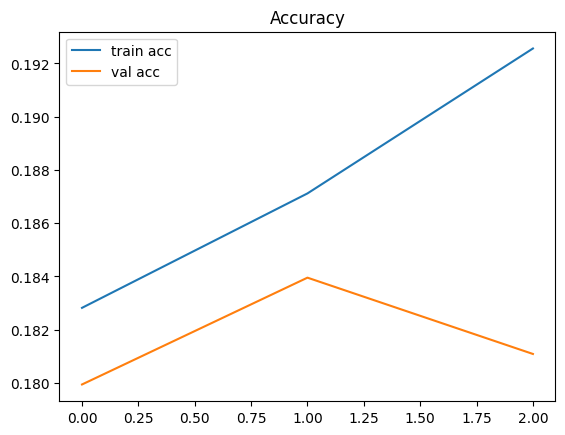

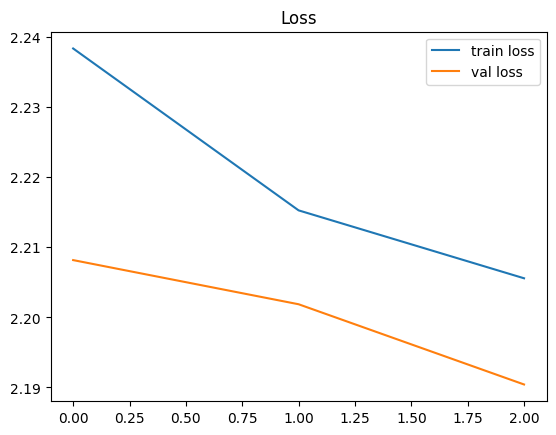

In [13]:

# Plot training vs. validation accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')

plt.figure()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')

In [11]:
model.save('my_mobilenetv2_model.keras')

AttributeError: '_PrefetchDataset' object has no attribute 'class_names'